In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("G:\\Python_practice\\regression\\salary\\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


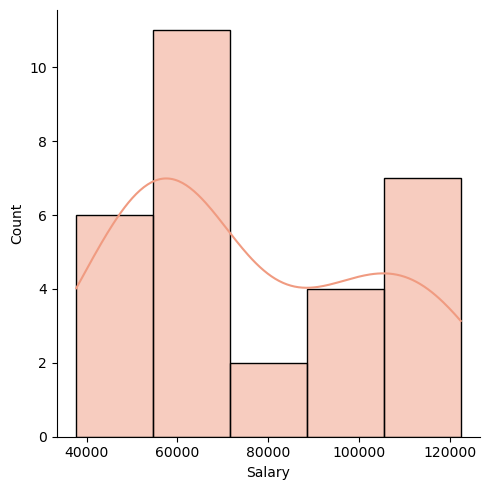

In [26]:
sns.displot(df['Salary'], kde=True, bins=5, kind="hist", color='#F09B81')

plt.show()

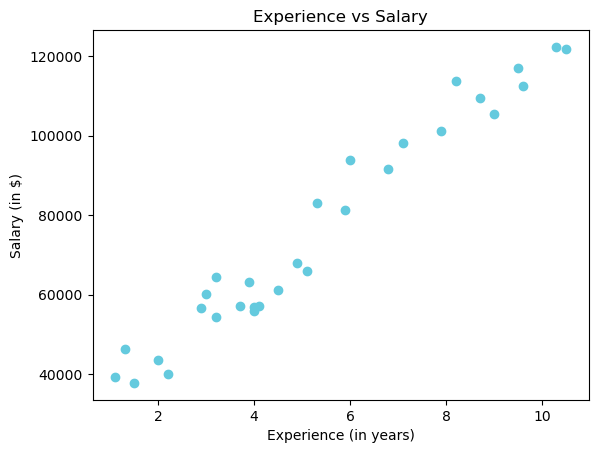

In [27]:
plt.scatter(df['YearsExperience'], df['Salary'], color = "#64CADE")
plt.title("Experience vs Salary")
plt.xlabel("Experience (in years)")
plt.ylabel("Salary (in $)")
plt.show()

In [28]:
X = df[['YearsExperience']] #independent variable
y = df['Salary'] #dependent variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% training and 25% test

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [32]:
X_test =scaler.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression(n_jobs=-1)

In [37]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [38]:
print('Coefficient:', regression.coef_)
print('Intercept:', regression.intercept_)

Coefficient: [25063.1519945]
Intercept: 70416.40909090909


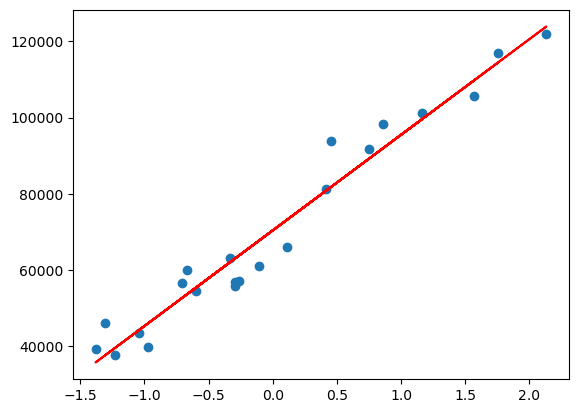

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')

In [40]:
y_pred = regression.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [45]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(score)

471493723.75658923
20949.71590909091
21713.906229800967
0.2067890553782903


In [46]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(y_train, X_train).fit()


In [48]:
predictions = model.predict(X_test)
print(predictions)

[ 27598.98923493 -17716.38173596  14100.79362658 -13859.75441929
 -34107.04783181 -29286.26368597  34348.08703911  18921.57777242]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Fri, 05 Sep 2025   Prob (F-statistic):                       0.119
Time:                        09:05:08   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------